In [1]:
from typing import Mapping, Any, Sequence
import copy
import os
import os.path
import functools

In [2]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import pathlib
import importlib

In [3]:
import ray
import tensorflow as tf

2024-05-24 18:19:20.498247: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 18:19:20.625864: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-24 18:19:20.627147: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-24 18:19:22.148418: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from exps import dataproc, plotting

In [6]:
from daaf import estimator_metrics

In [7]:
files = tf.io.gfile.glob(f"{pathlib.Path.home()}/fs/daaf/exp/evaljob/agg/1715693336/1716563030/metrics/*.parquet")

In [8]:
df_metrics = dataproc.read_data(files)

2024-05-24 18:19:27,486	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 
/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/datasource/parquet_datasource.py:242: FutureWarning: Passing 'use_legacy_dataset' is deprecated as of pyarrow 15.0.0 and will be removed in a future version.
  pq_ds = pq.ParquetDataset(


Metadata Fetch Progress 0:   0%|          | 0/32 [00:00<?, ?it/s]

Parquet Files Sample 0:   0%|          | 0/2 [00:00<?, ?it/s]

(_execute_read_task_split pid=2902154) /home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
(_execute_read_task_split pid=2902154)   return transform_pyarrow.concat(tables)


Read progress 0:   0%|          | 0/194 [00:00<?, ?it/s]

/home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'.
  return transform_pyarrow.concat(tables)
(_execute_read_task_split pid=2901899) /home/guilherme/.pyenv/versions/3.8.15/envs/rl_daaf_py38/lib/python3.8/site-packages/ray/data/_internal/arrow_block.py:148: FutureWarning: promote has been superseded by promote_options='default'. [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_execute_read_task_split pid=2901899)   return transform_pyarrow.concat(tables) [repeated 3x across cluster]


In [9]:
df_metrics.head()

episode                             exp_id  \
0      610    1715693336-4d0485f3-RedGreenSeq   
1      610  1715693336-4ce5bb5a-FrozenLake-v1   
2      610         1715693336-4e062c50-ABCSeq   
3      610         1715693336-4dcbb93d-ABCSeq   
4      610    1715693336-228e508d-RedGreenSeq   

                                                meta  \
0  {'algorithm': 'first-visit-mc', 'algorithm_arg...   
1  {'algorithm': 'nstep-td', 'algorithm_args': '{...   
2  {'algorithm': 'first-visit-mc', 'algorithm_arg...   
3  {'algorithm': 'first-visit-mc', 'algorithm_arg...   
4  {'algorithm': 'first-visit-mc', 'algorithm_arg...   

                                        state_values  \
0  {'data': [-23.701640886662382, -20.76393574291...   
1  {'data': [0.0019852628197541914, 0.00192169514...   
2  {'data': [-48.449180327868866, -41.25222024866...   
3  {'data': [-35.82121156792569, -33.700229352466...   
4  {'data': [-23.585245085407585, -20.71311382530...   

                               over_states_then_runs  \
0  {'mae': [0.24662922273552246, 0.11384366368135...   
1  {'mae': [0.05707145509416116, 0.05532751432833...   
2  {'mae': [0.262245748864416, 0.4735048430176720...   
3  {'mae': [0.5909835615854231, 1.293206521166743...   
4  {'mae': [0.18014629130386833, 0.10564646861141...   

                               over_runs_then_states     method  
0  {'mae': [0.21868771240537227, 0.18754060469274...   PP/LEAST  
1  {'mae': [0.0070654955389033245, 0.007129850150...  PP/nTD-SU  
2  {'mae': [0.44491801951222276, 0.44551223222942...      OP/OT  
3  {'mae': [1.8466975185748626, 0.600611242465600...     PP/IMR  
4  {'mae': [0.28288932368055075, 0.19789091247600...   PP/LEAST

In [10]:
df_metrics.iloc[0]

episode                                                                610
exp_id                                     1715693336-4d0485f3-RedGreenSeq
meta                     {'algorithm': 'first-visit-mc', 'algorithm_arg...
state_values             {'data': [-23.701640886662382, -20.76393574291...
over_states_then_runs    {'mae': [0.24662922273552246, 0.11384366368135...
over_runs_then_states    {'mae': [0.21868771240537227, 0.18754060469274...
method                                                            PP/LEAST
Name: 0, dtype: object

In [11]:
df_metrics.iloc[0]["meta"]

{'algorithm': 'first-visit-mc',
 'algorithm_args': '{}',
 'discount_factor': 1.0,
 'drop_truncated_feedback_episodes': False,
 'dyna_prog_state_values': array([-23.99999997, -21.        , -18.        , -15.        ,
        -12.        ,  -9.        ,  -6.        ,  -3.        ,
          0.        ]),
 'env': {'args': '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
  'level': 'n=9',
  'name': 'RedGreenSeq',
  '_level': 'NNLHYJFTC5ENMMDZWRNQ37B6VVDXQ7WHB5EJOPXYZFLMJEZOYLTSLB4ID4WHQG57XQPNUHGZCFDCWHYGXWSBW7FBWYRZGAGBW4J7MEQ='},
 'epsilon': 0.0,
 'exp_id': '1715693336-4d0485f3-RedGreenSeq',
 'learning_rate': 0.1,
 'policy_type': 'PP',
 'reward_period': 8,
 'run_id': 5,
 'traj_mapping_method': 'LEAST'}

In [12]:
envs = dataproc.get_distinct_envs(df_metrics)

In [13]:
envs

{('RedGreenSeq',
  'n=9'): '{"cure": ["red", "green", "wait", "green", "red", "red", "green", "wait"]}',
 ('FrozenLake-v1', '4x4'): '{"is_slippery": false, "map_name": "4x4"}',
 ('ABCSeq', 'n=7'): '{"length": 7, "distance_penalty": false}',
 ('IceWorld', '4x4'): '{"map_name": "4x4"}',
 ('ABCSeq', 'n=10'): '{"length": 10, "distance_penalty": false}',
 ('IceWorld', '8x8'): '{"map_name": "8x8"}',
 ('TowerOfHanoi', 'disks=4'): '{"num_disks": 4}',
 ('GridWorld',
  '4x12'): '{"grid": "oooooooooooo\\noooooooooooo\\noooooooooooo\\nsxxxxxxxxxxg"}'}

In [14]:
sorted(envs)

[('ABCSeq', 'n=10'),
 ('ABCSeq', 'n=7'),
 ('FrozenLake-v1', '4x4'),
 ('GridWorld', '4x12'),
 ('IceWorld', '4x4'),
 ('IceWorld', '8x8'),
 ('RedGreenSeq', 'n=9'),
 ('TowerOfHanoi', 'disks=4')]

In [15]:
df_eval_result = dataproc.create_eval_result_data(df_metrics)

In [16]:
df_eval_result["one-step"]

episode                             exp_id  \
2           610         1715693336-4e062c50-ABCSeq   
17          610         1715693336-2b44c6ca-ABCSeq   
34          610    1715693336-114e3c44-RedGreenSeq   
52          610  1715693336-4108c881-FrozenLake-v1   
75          610       1715693336-3b825cfc-IceWorld   
...         ...                                ...   
175956     1450    1715693336-e9f25257-RedGreenSeq   
175972     1450       1715693336-e6ce2746-IceWorld   
175978     1450   1715693336-ed7c88cd-TowerOfHanoi   
175989     1450  1715693336-eb7ac5ae-FrozenLake-v1   
175993     1450       1715693336-f86d47cc-IceWorld   

                                             state_values  \
2       {'data': [-48.449180327868866, -41.25222024866...   
17      {'data': [-100.21475409836066, -90.44234079173...   
34      {'data': [-22.51255477466734, -19.556831651273...   
52      {'data': [0.013114754098360675, 0.012195121951...   
75      {'data': [-38.48032786885243, -36.483999999999...   
...                                                   ...   
175956  {'data': [-19.773078358259696, -18.39684093430...   
175972  {'data': [-43.75085192194265, -42.304188202498...   
175978  {'data': [-98.62028843889851, -87.832836685224...   
175989  {'data': [0.0006775993665996462, 0.00041800367...   
175993  {'data': [-36.650196876704506, -36.53715875658...   

                                    over_states_then_runs  \
2       {'mae': [0.262245748864416, 0.4735048430176720...   
17      {'mae': [0.3372459194673809, 1.519203020827704...   
34      {'mae': [0.4597925458150907, 0.319296610183049...   
52      {'mae': [0.016688698401635536, 0.0323210646682...   
75      {'mae': [0.6593178010810314, 1.124109425258274...   
...                                                   ...   
175956  {'mae': [0.6521975846321195, 1.348738366226647...   
175972  {'mae': [92.7507318788939, 97.01830250824788, ...   
175978  {'mae': [1.7527190241926123, 0.944402273645116...   
175989  {'mae': [0.05615855060713067, 0.05723812074652...   
175993  {'mae': [81.50377811639274, 82.87937482135806,...   

                                    over_runs_then_states    method  \
2       {'mae': [0.44491801951222276, 0.44551223222942...     OP/OT   
17      {'mae': [0.9413934082566172, 0.938486125093275...     OP/OT   
34      {'mae': [1.3721871456416408, 0.991836252769675...     OP/OT   
52      {'mae': [0.0035267206479108254, 0.005560927937...     OP/OT   
75      {'mae': [0.21691571854956848, 0.33575237503745...     OP/OT   
...                                                   ...       ...   
175956  {'mae': [1.2189835188137204, 1.009918857615534...  PP/LEAST   
175972  {'mae': [116.0169096883267, 115.44542356306147...  PP/LEAST   
175978  {'mae': [0.1677729777897099, 1.072061480552895...  PP/LEAST   
175989  {'mae': [0.01214878874056895, 0.01015502135772...  PP/LEAST   
175993  {'mae': [87.3823863371204, 88.49010772657256, ...  PP/LEAST   

             algorithm algorithm_args  reward_period  discount_factor  \
2       first-visit-mc             {}              2             1.00   
17      first-visit-mc             {}              2             1.00   
34      first-visit-mc             {}              2             0.99   
52      first-visit-mc             {}              2             1.00   
75      first-visit-mc             {}              2             1.00   
...                ...            ...            ...              ...   
175956     one-step-td             {}              8             0.99   
175972     one-step-td             {}              8             1.00   
175978     one-step-td             {}              8             0.99   
175989     one-step-td             {}              8             1.00   
175993     one-step-td             {}              8             0.99   

        drop_truncated_feedback_episodes    level           name  
2                                  False      n=7         ABCSeq  
17                           

In [17]:
plot_eval_result = functools.partial(
    plotting.plot_eval_result,
    metric_family = "over_runs_then_states",
    metric_col = "mae",
    max_episode = np.inf,
    max_reward_period = 8,
    output_dir = "figures/evalerror_mae"
)

## ABC, n=10, $\gamma=1.0$

first-visit-mc
one-step-td


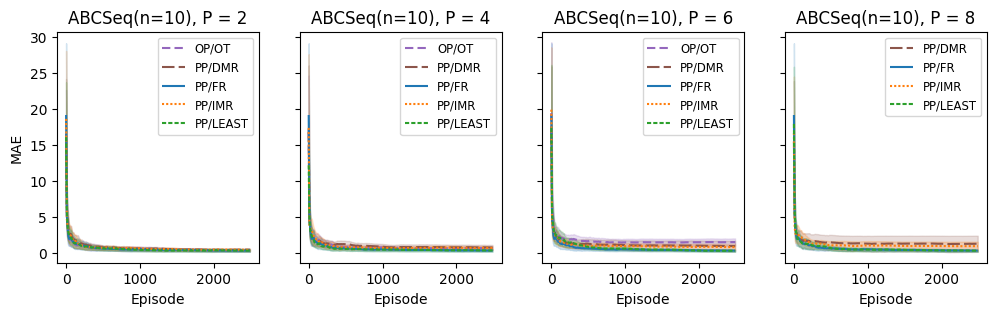

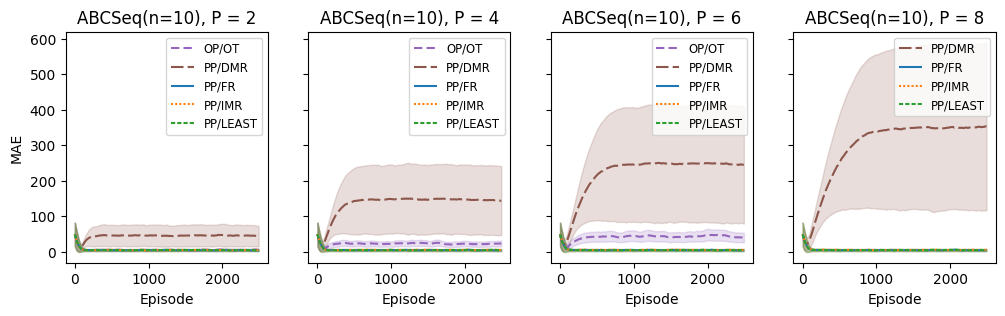

In [18]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


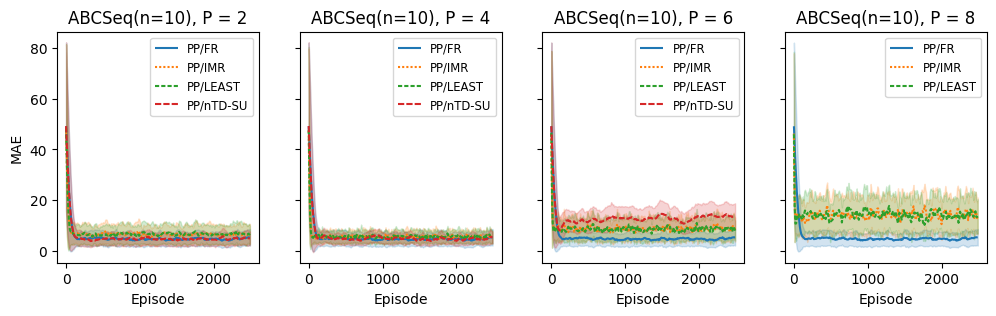

In [19]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=10, $\gamma=0.99$

first-visit-mc
one-step-td


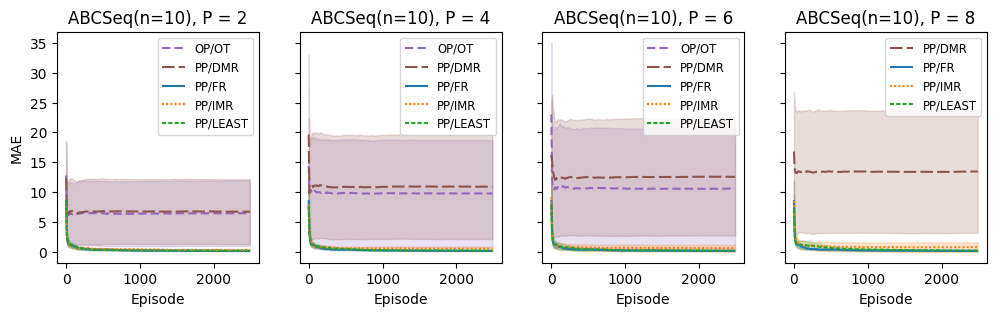

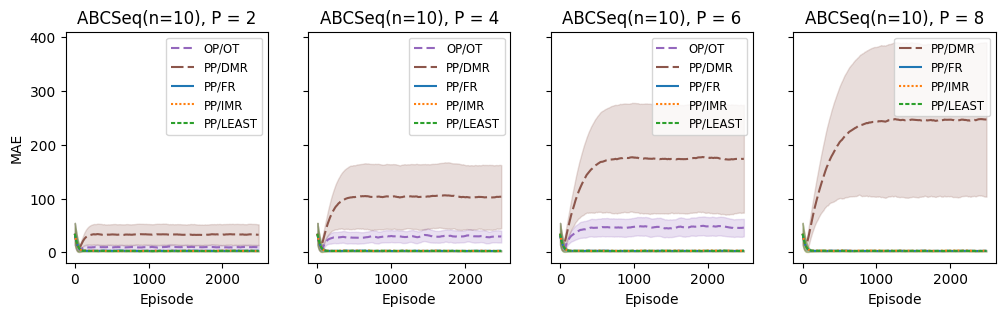

In [20]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


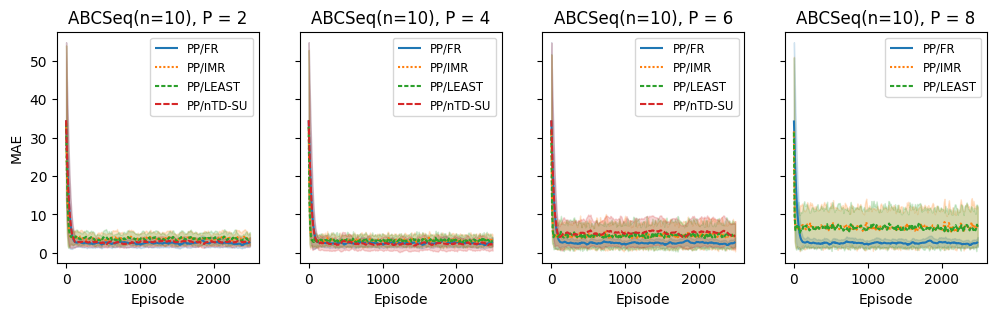

In [21]:
plot_eval_result(
    env="ABCSeq",
    level="n=10",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=1.0$

first-visit-mc
one-step-td


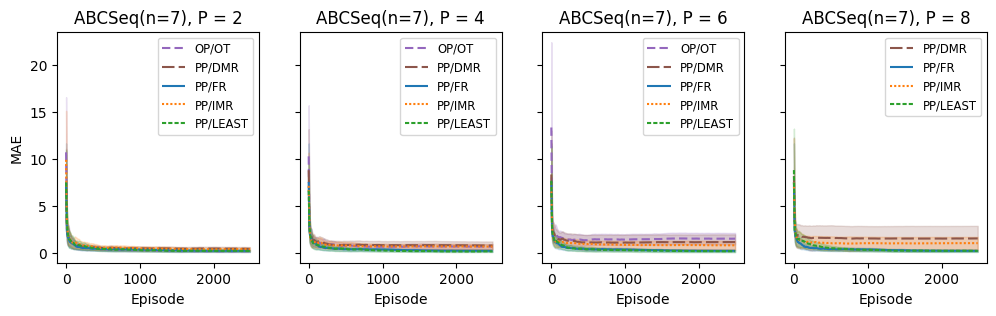

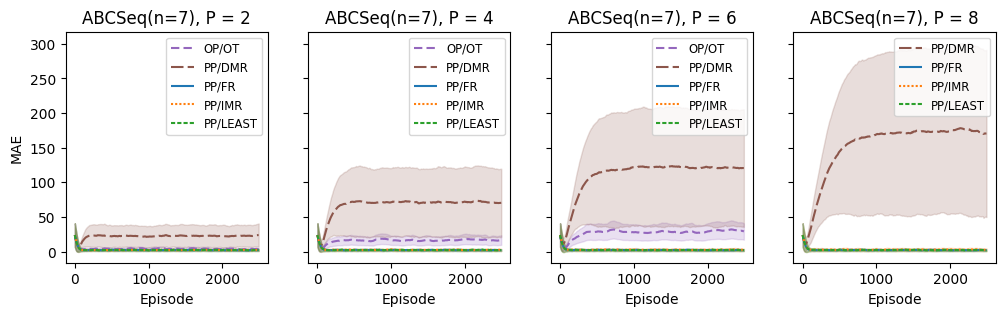

In [22]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


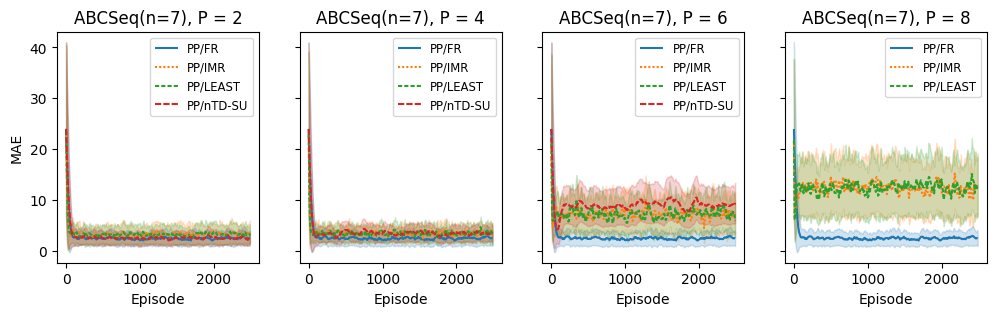

In [23]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,

    df_data=df_eval_result,
    suffix="n-step"
)

## ABC, n=7, $\gamma=0.99$

first-visit-mc
one-step-td


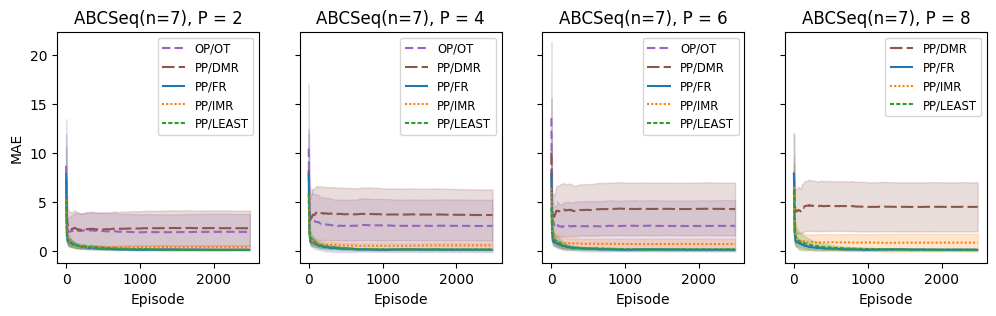

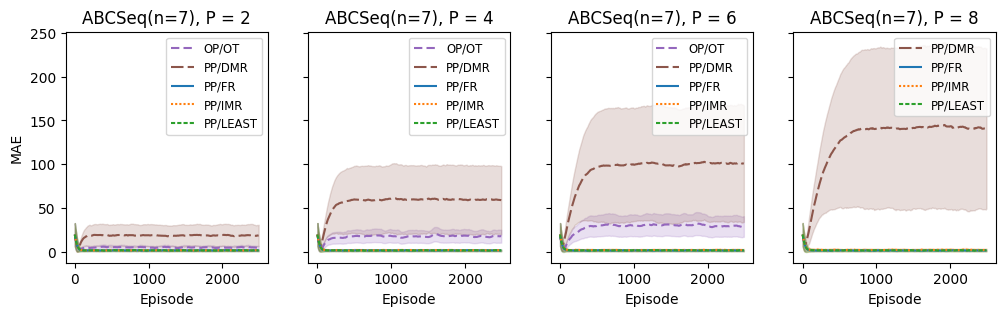

In [24]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


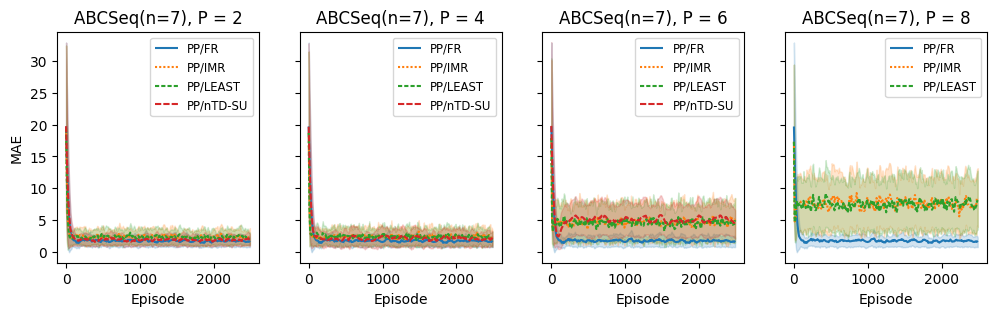

In [25]:
plot_eval_result(
    env="ABCSeq",
    level="n=7",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=1.0$

first-visit-mc
one-step-td


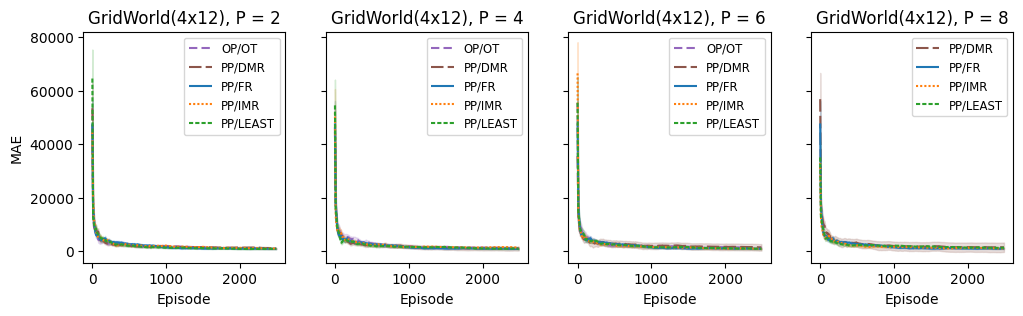

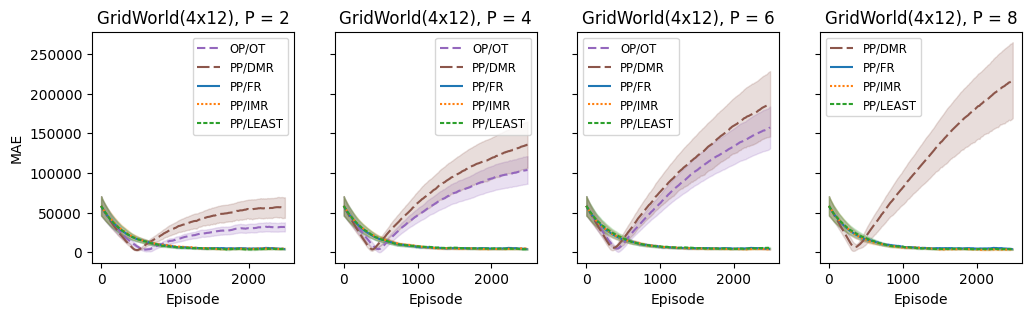

In [26]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


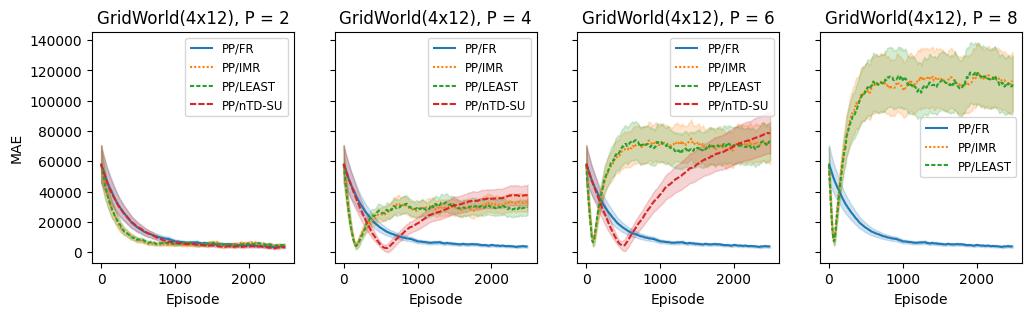

In [27]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## GridWorld, 4x12, $\gamma=0.99$

first-visit-mc
one-step-td


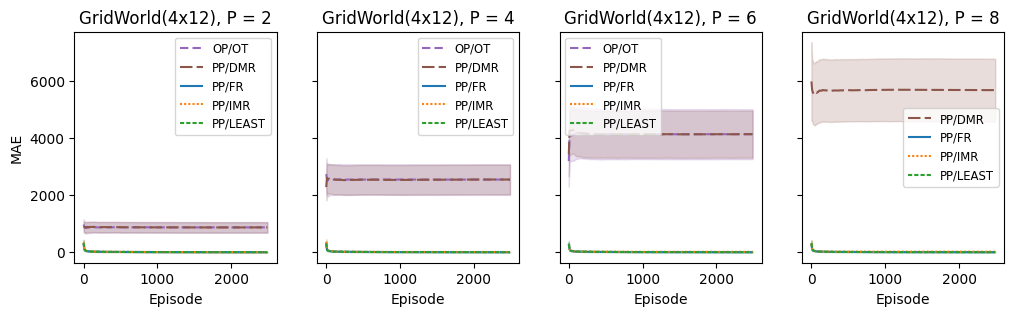

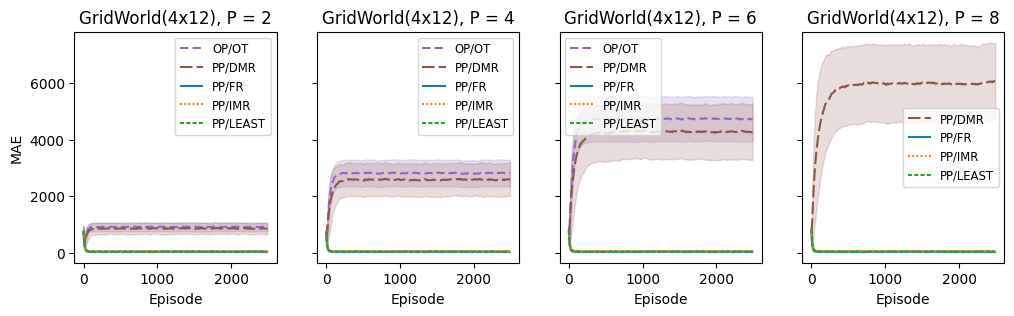

In [28]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


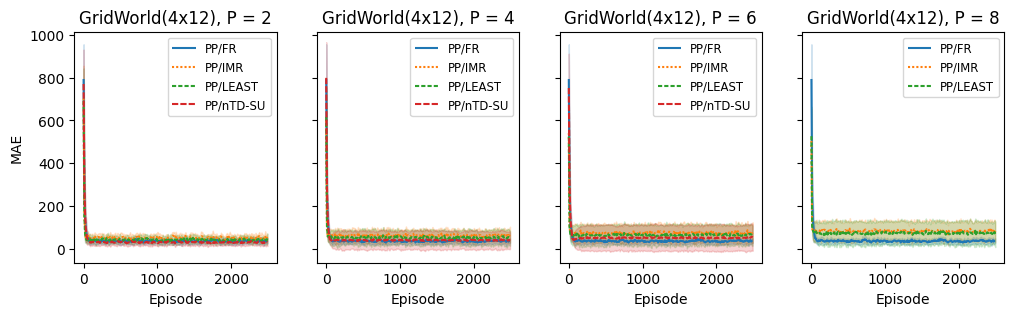

In [29]:
plot_eval_result(
    env="GridWorld",
    level="4x12",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=1.0$

first-visit-mc
one-step-td


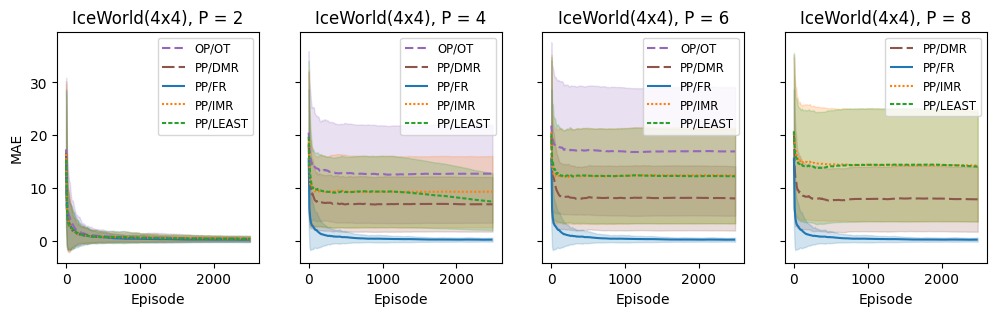

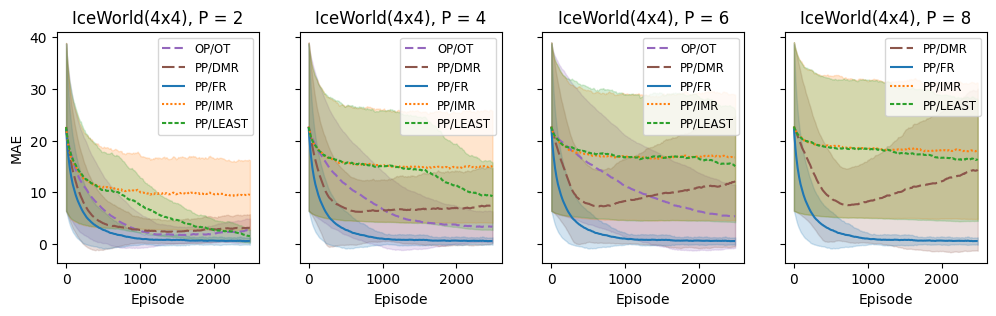

In [30]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


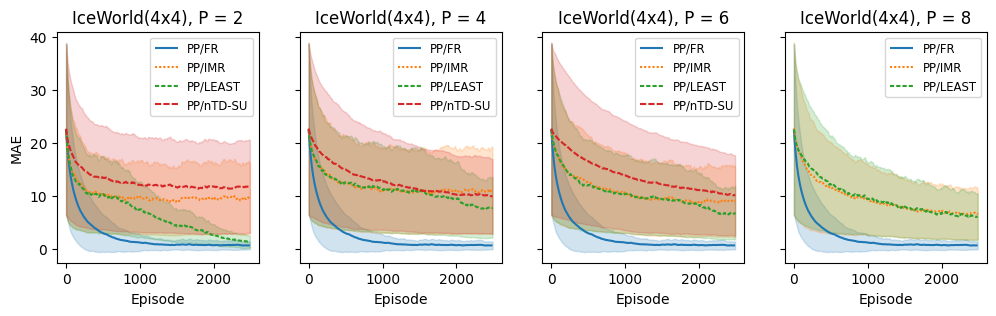

In [31]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 4x4, $\gamma=0.99$

first-visit-mc
one-step-td


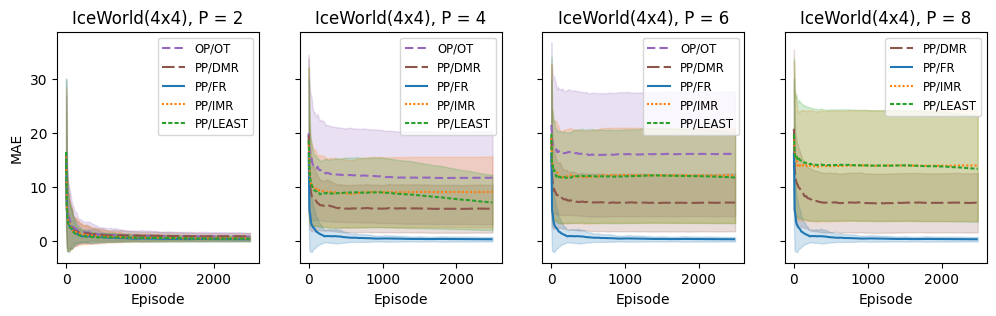

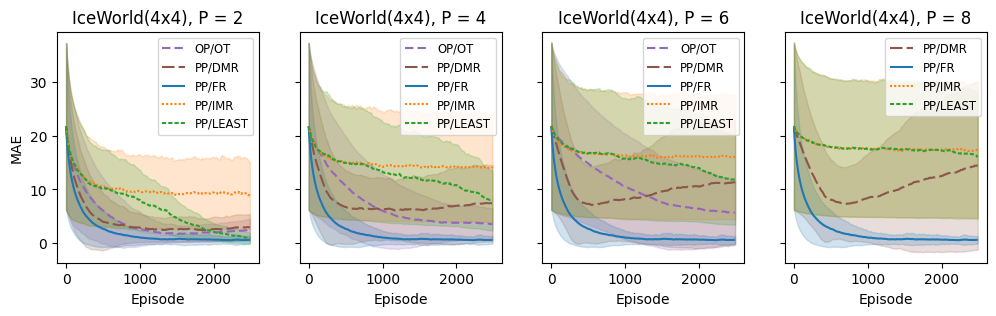

In [32]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


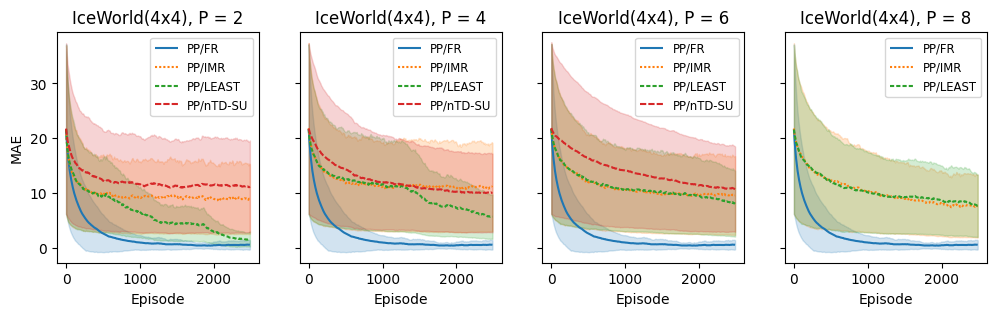

In [33]:
plot_eval_result(
    env="IceWorld",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=1.0$

first-visit-mc
one-step-td


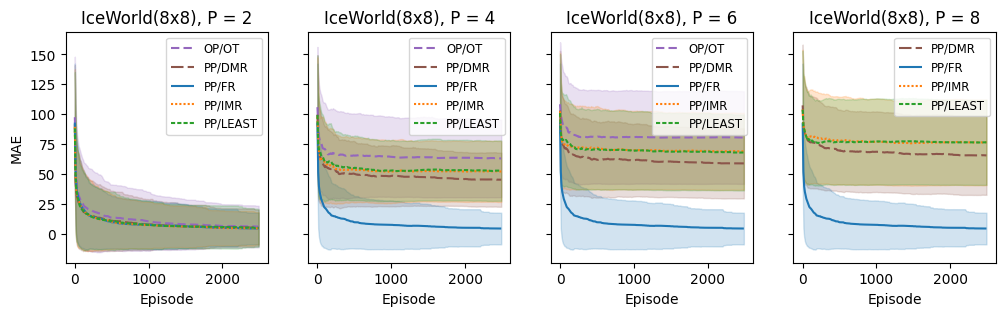

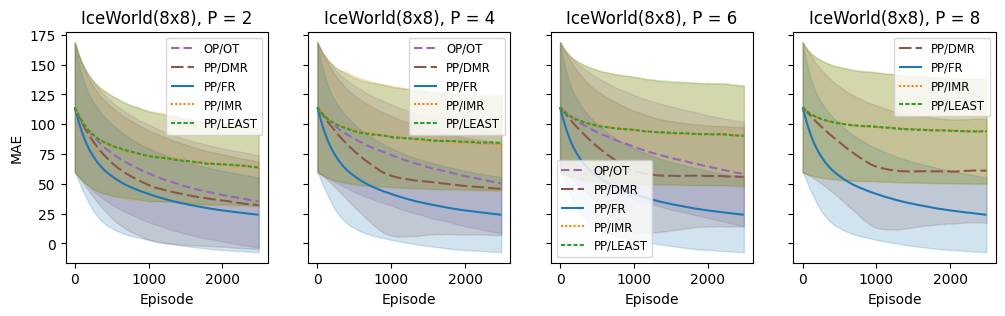

In [34]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


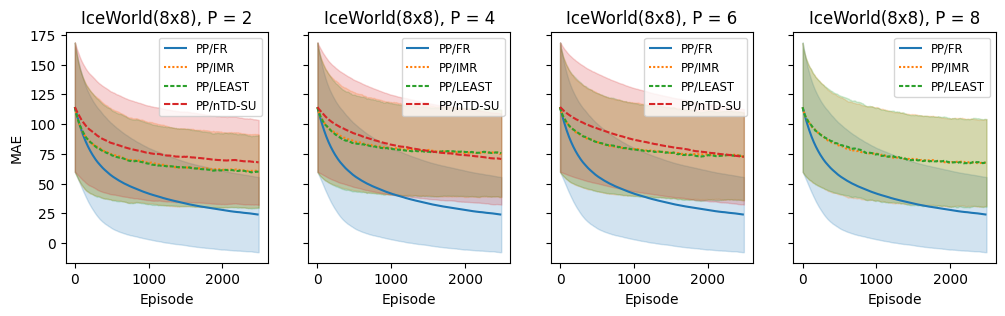

In [35]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## IceWorld, 8x8, $\gamma=0.99$

first-visit-mc
one-step-td


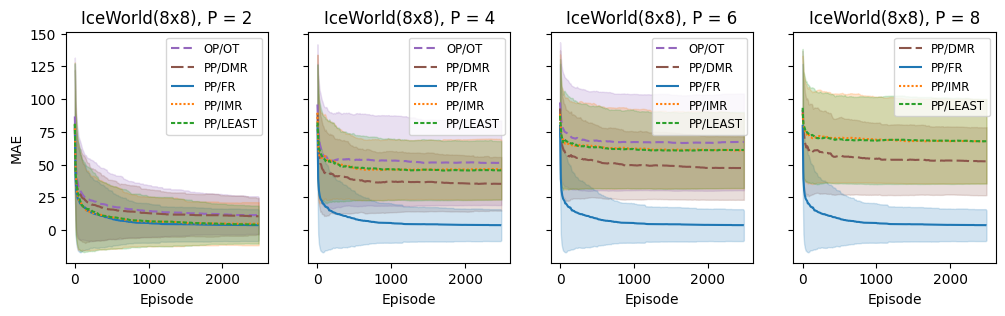

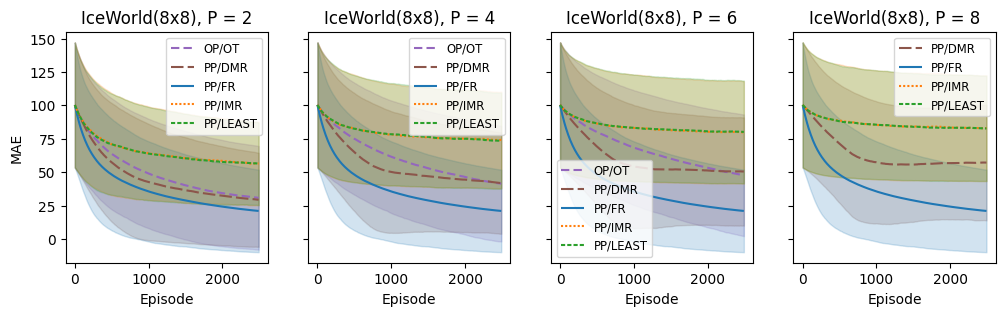

In [36]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


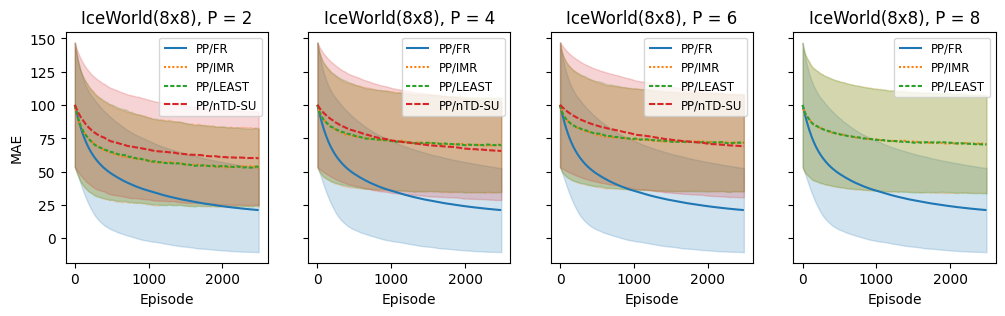

In [37]:
plot_eval_result(
    env="IceWorld",
    level="8x8",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=1.0$

first-visit-mc
one-step-td


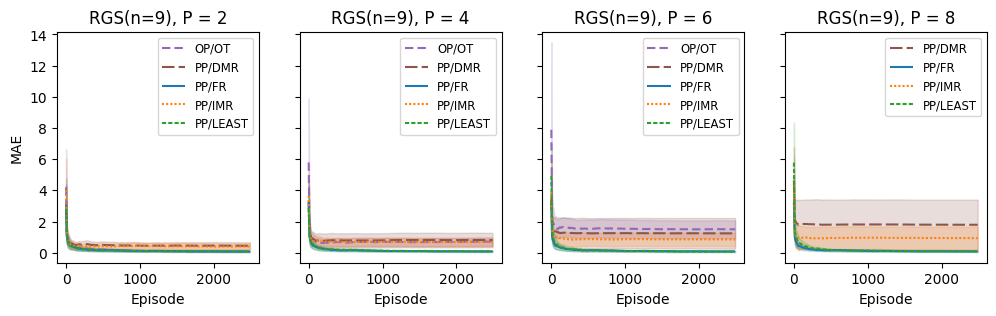

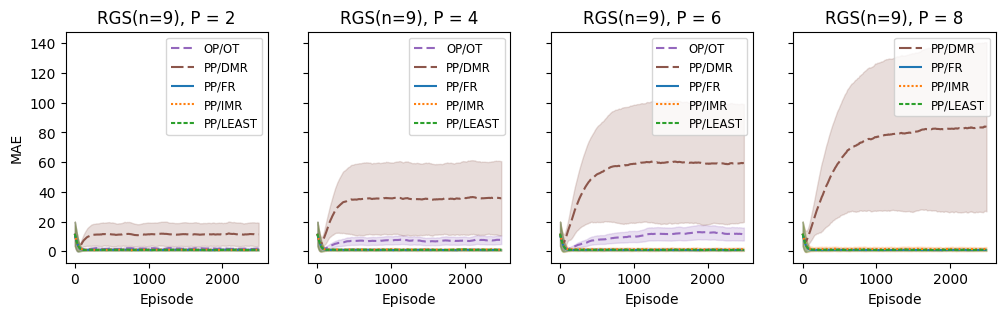

In [38]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


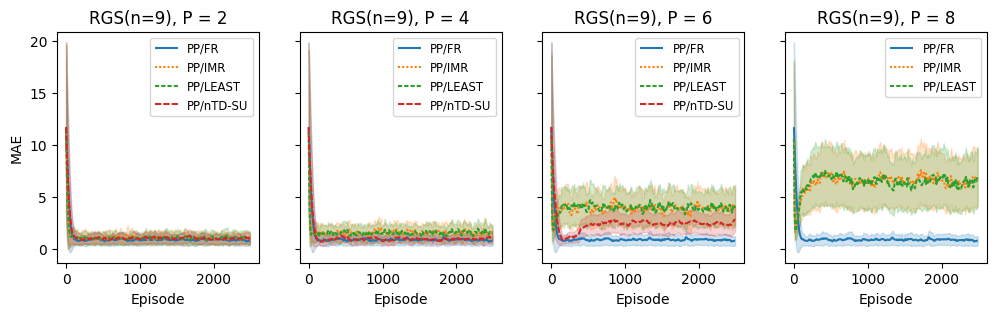

In [39]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## RedGreenSeq, n=9, $\gamma=0.99$

first-visit-mc
one-step-td


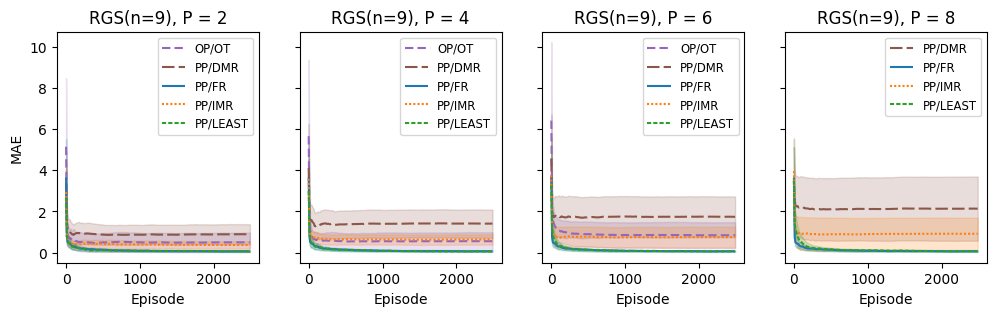

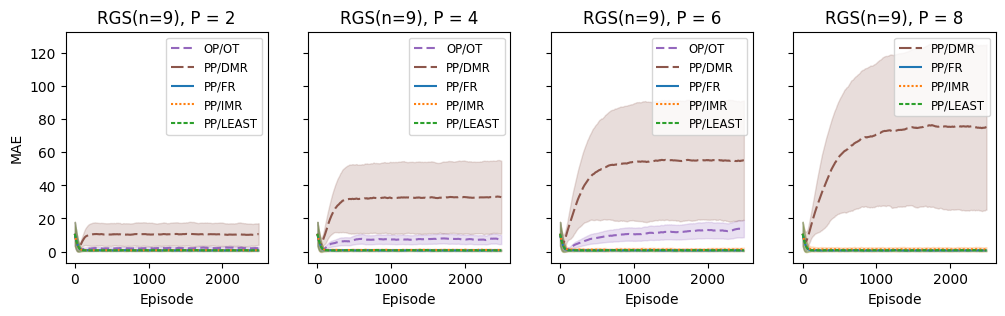

In [40]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


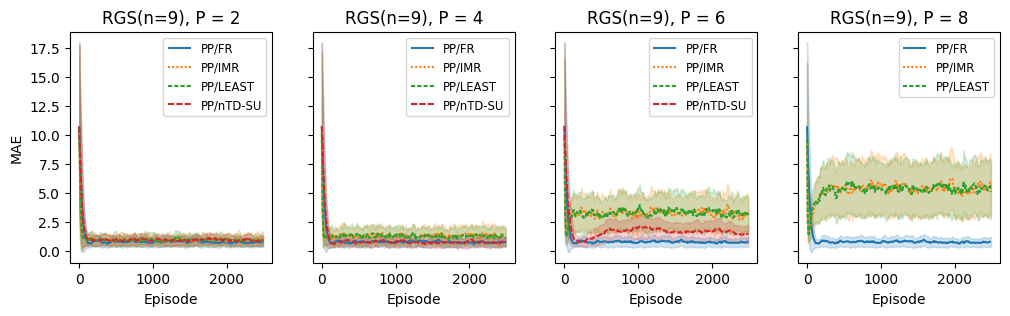

In [41]:
plot_eval_result(
    env="RedGreenSeq",
    level="n=9",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=1.0$

first-visit-mc
one-step-td


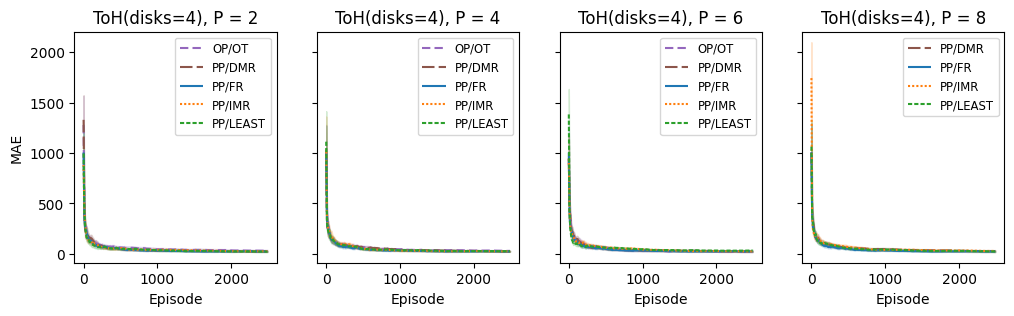

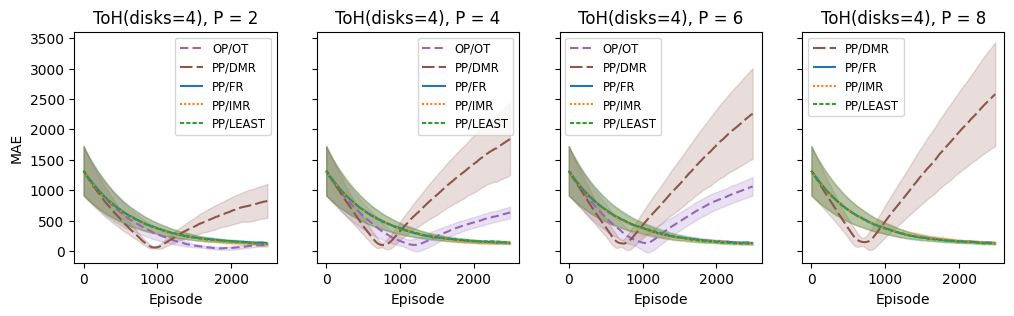

In [42]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


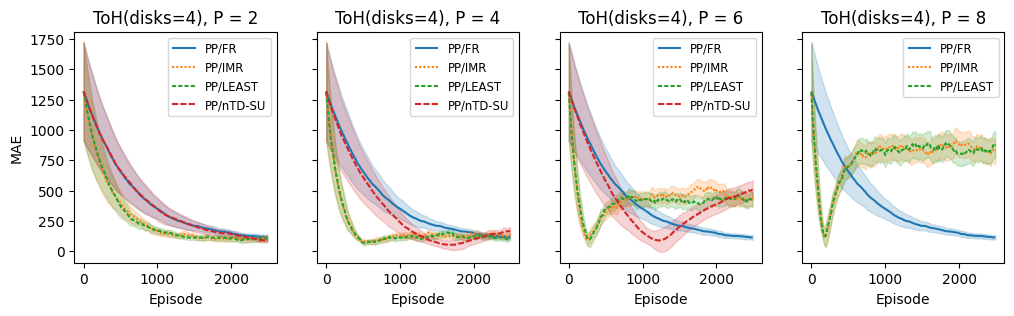

In [43]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## TowerOfHanoi, disks=4, $\gamma=0.99$

first-visit-mc
one-step-td


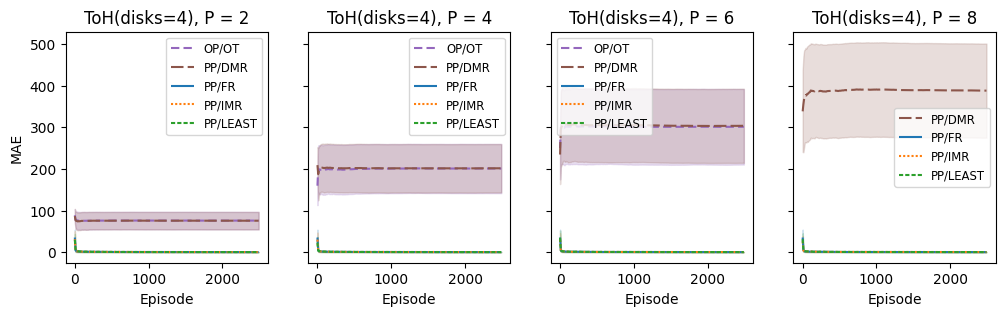

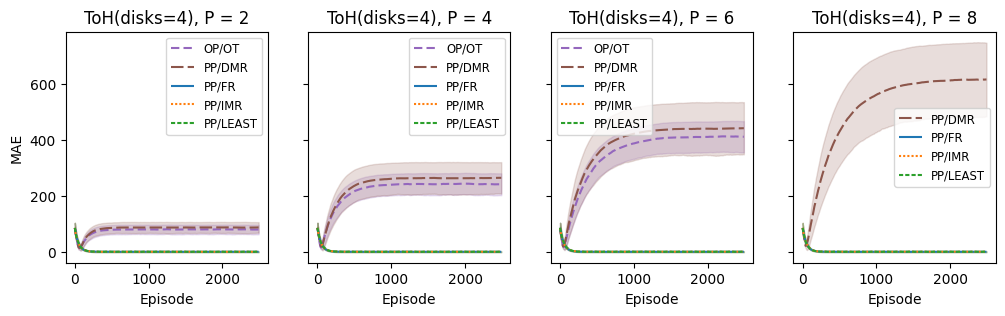

In [44]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


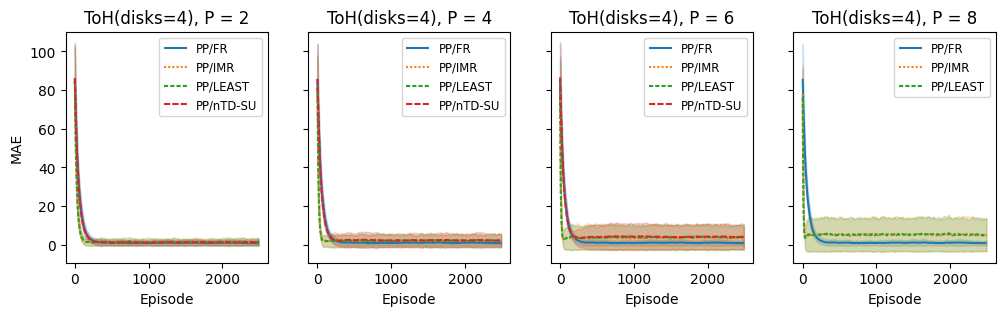

In [45]:
plot_eval_result(
    env="TowerOfHanoi",
    level="disks=4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## FrozenLake-v1, 4x4, $\gamma=1.0$

first-visit-mc
one-step-td


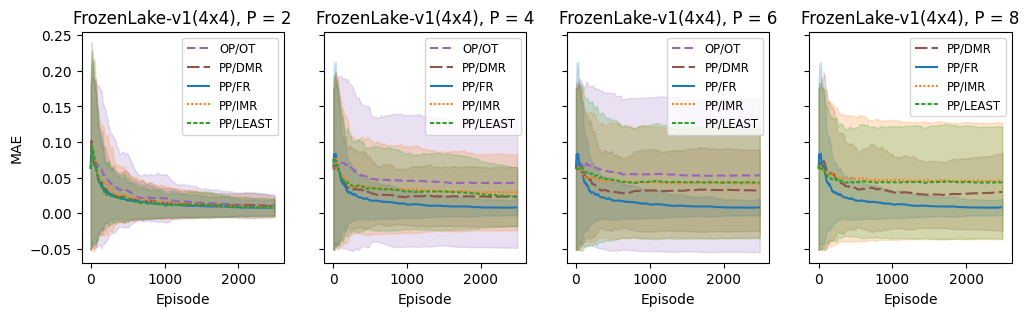

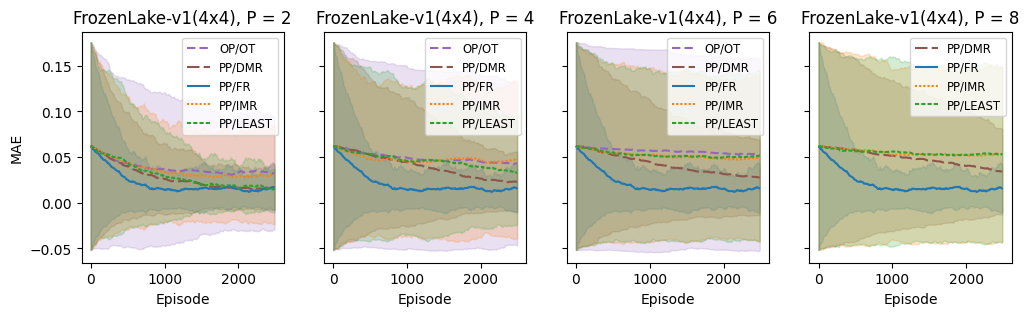

In [46]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


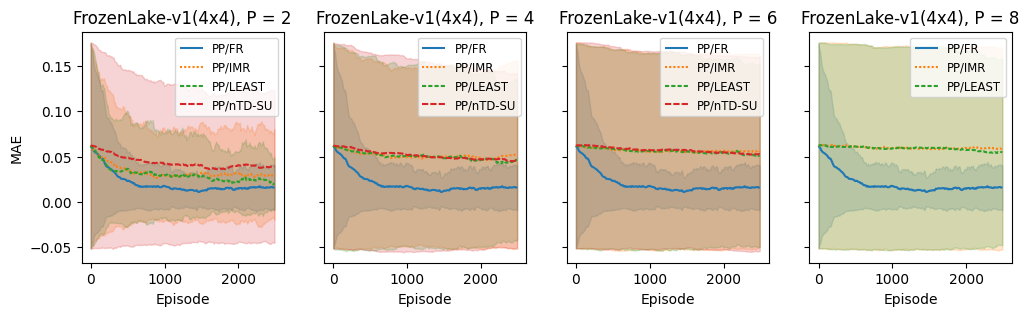

In [47]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=1.0,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)

## FrozenLake-v1, 4x4, $\gamma=0.99$

first-visit-mc
one-step-td


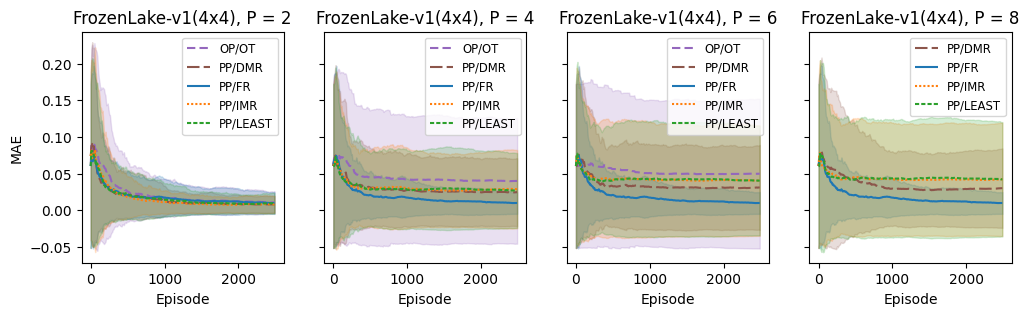

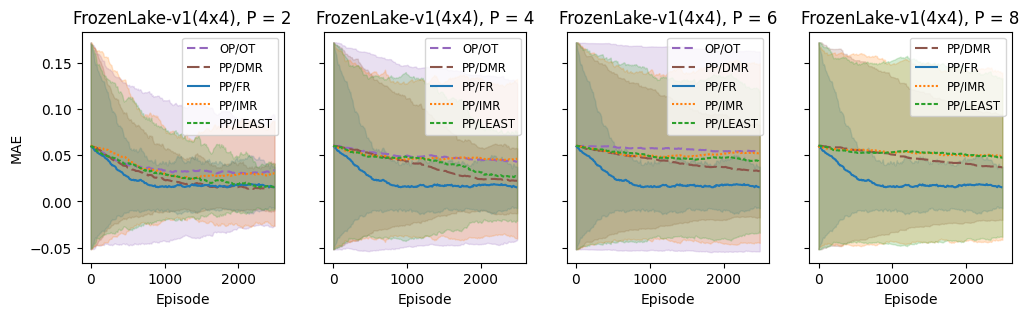

In [48]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="one-step"
)

nstep-td


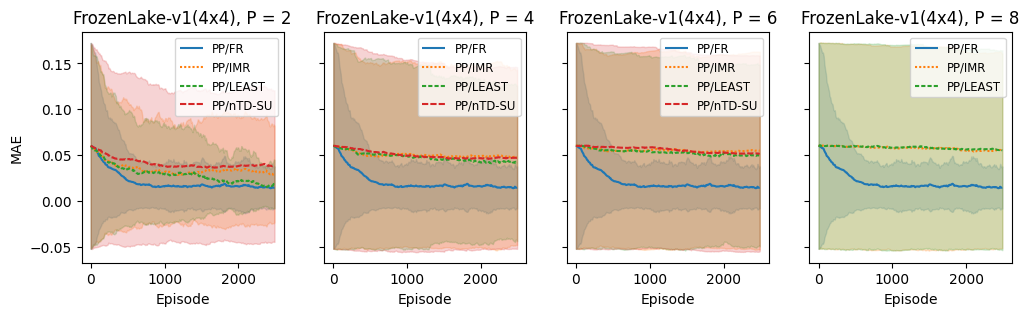

In [49]:
plot_eval_result(
    env="FrozenLake-v1",
    level="4x4",
    discount_factor=0.99,
    drop_truncated_feedback_episodes=False,
    df_data=df_eval_result,
    suffix="n-step"
)